In [1]:
import pandas as pd              # 필요 모듈 호출
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_dataset.csv', index_col = 0) # simple regression을 수행하기 위해 경험년도에 따른 연봉 데이터셋 불러오기
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [3]:
df.info() # 결측치가 없음을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [4]:
df.describe() # 두 변수 모두 수치형이기에 기술통계량 확인 가능

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


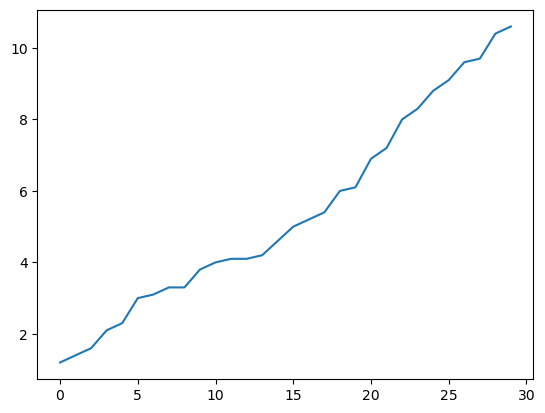

In [5]:
plt.plot(df['YearsExperience']) # 시각화를 통해 경험 데이터 분포 확인

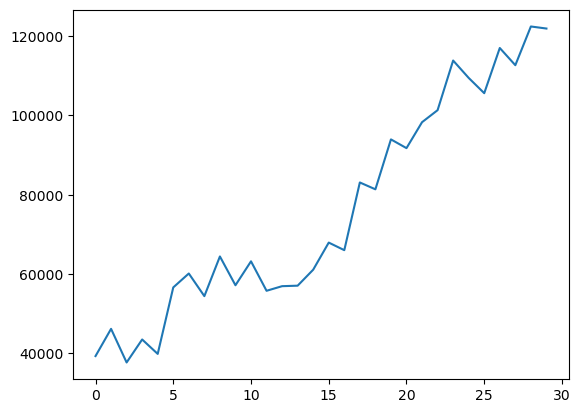

In [6]:
plt.plot(df['Salary'])# 시각화를 통해 연봉 데이터 분포 확인

In [7]:
predict = df.Salary.mean() # 선형 회귀를 진행하기 위해 하나의 선을 가정하기위해서 평균을 선택
predict

76004.0

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

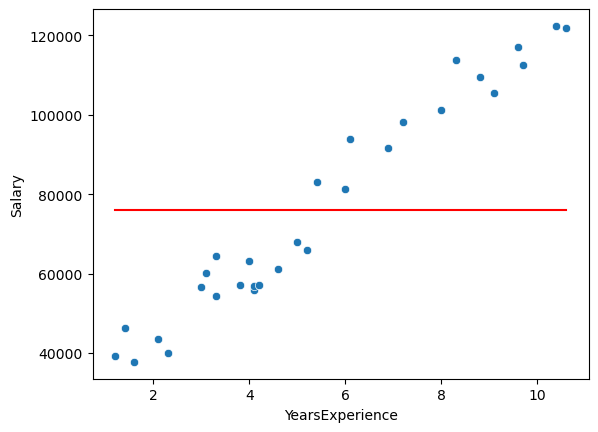

In [8]:
sns.scatterplot(x = df.YearsExperience, y = df.Salary)
sns.lineplot(x = df.YearsExperience, y = predict, color = 'red')  # 시각화를 통해 현재 데이터의 분포와 기준선을 확인

In [9]:
errors = predict - df.Salary # 실제값과 가정된 값의 차이를 확인 
errors

0     36660.0
1     29798.0
2     38272.0
3     32478.0
4     36112.0
5     19361.0
6     15853.0
7     21558.0
8     11558.0
9     18814.0
10    12785.0
11    20209.0
12    19046.0
13    18922.0
14    14892.0
15     8065.0
16     9974.0
17    -7085.0
18    -5360.0
19   -17937.0
20   -15735.0
21   -22270.0
22   -25299.0
23   -37809.0
24   -33428.0
25   -29579.0
26   -40966.0
27   -36632.0
28   -46388.0
29   -45869.0
Name: Salary, dtype: float64

In [10]:
mean_absolute_error = errors.abs().mean() # MAE를 확인 이 MAE를 줄이는 것이 목표이다.
mean_absolute_error

24290.466666666667

In [11]:
from sklearn.linear_model import LinearRegression # MAE를 최소화를 해주는 것을 직접 보여주지 못하기에  모듈을 호출 LinearRegression

X = df[['YearsExperience']] # 독립변수
y = df['Salary']            # 종속변수

X_train = X
y_train = y

model = LinearRegression()
model.fit(X_train, y_train)

X_test  =  [[x]  for  x  in  df['YearsExperience']]  
y_pred  =  model.predict(X_test)

y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
X_test  =  [[x]  for  x  in  df['YearsExperience']]  
y_pred  =  model.predict(X_test)

y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

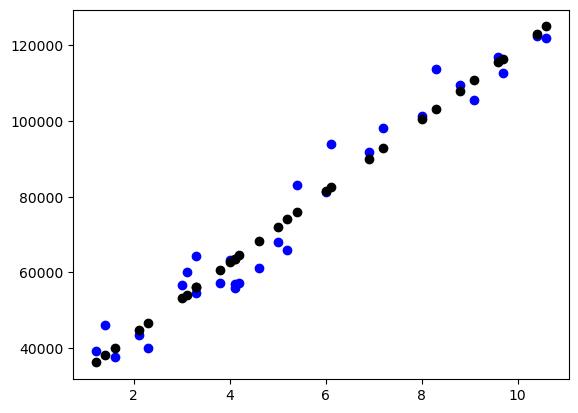

In [15]:
plt.scatter(X_test, y_train, color = 'blue', linewidth = 1) # 시각화를 통해 모델링을 진행하고 추정된 파라미터에 따라 예측함수를 만들고 시각화
plt.scatter(X_test, y_pred, color='black', linewidth=1)     # 선형 회귀를 통해 데이터를 가장 잘 설명해줄 수 있는 함수를 생성하였다. 

In [16]:
print(model.coef_) # 회귀 계수
print(model.intercept_) # 절편

# f(X) = 9449.96x + 24848

[9449.96232146]
24848.203966523193
